In [1]:
#final output contains the merged file for sulfate, nitrate and the metadata etc.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             mean_absolute_percentage_error, explained_variance_score, 
                             max_error, mean_squared_log_error, median_absolute_error, 
                             r2_score, mean_poisson_deviance, mean_gamma_deviance)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
df = pd.read_csv('/Users/defne/Downloads/alles.csv')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['station_id', 'Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_47064/222829863.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/alles.csv')


In [3]:
df.columns

Index(['site_latitude', 'site_longitude', 'NO3', 'SO4', 'NO3-', 'SO42-',
       'elevation_1k', 'elevation_yNA_bNA', 'road_class_1_700',
       'road_class_2_50', 'road_class_1_500', 'road_class_3_50',
       'road_class_2_400', 'road_class_1_100', 'road_class_2_700',
       'road_class_3_100', 'road_class_2_500', 'road_class_1_400',
       'road_class_3_400', 'road_class_1_2000', 'road_class_3_1000',
       'road_class_3_10000', 'road_class_1_300', 'road_class_3_500',
       'road_class_2_2000', 'road_class_1_1000', 'road_class_3_300',
       'road_class_2_200', 'road_class_1_200', 'road_class_2_1000',
       'road_class_1_5000', 'road_class_1_50', 'road_class_3_200',
       'road_class_3_5000', 'road_class_2_300', 'road_class_2_5000',
       'road_class_3_2000', 'road_class_2_100', 'road_class_3_700',
       'road_class_2_10000', 'road_class_1_10000', 'imd_b500', 'imd_b1000',
       'imd', 'CLC', 'snow_ice_b1000', 'snow_ice_b500', 'urban_fabric_b1000',
       'urban_fabric_b500', 'in

In [4]:
df.shape

(482614, 77)

In [5]:
#Getting rid of nan values and non numeric values
for col in df.columns:
     df[col] = pd.to_numeric(df[col], errors='coerce')


In [6]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]
    

In [7]:
df.shape

(173503, 77)

# Random Forest - predicting the concentration

In [8]:

# Define the variable to predict (Nitrate) and features

y = df['NO3-'] 
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Split the data into training and validation sets
xv = X.sample(frac=0.2)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(xv.index) # Y for training (80%)

#print(xx)
# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=125) # Need to tune these parameters
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set


yv_const = yv


In [22]:
#Code for MAPE #5th pecentile 0.3 for nitrate 0.1 for sulfate
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 0.3 # A small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


R² score: 0.8090159476061045
Mean Absolute Error (MAE): 0.3947794007024437
Mean Squared Error (MSE): 0.9178610654767112
Root Mean Squared Error (RMSE): 0.9580506591390203
Mean Absolute Percentage Error (MAPE): 22.826456158330842 %


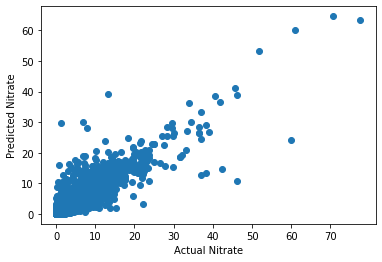

(34701,)
(34701,)


In [10]:
print('R² score:', regr.score(xv, yv))
print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))
print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))
print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(yv, y_val), '%')

# Convert yv to float
yv = pd.to_numeric(yv, errors='coerce')

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')

# Set x-ticks
xtick_range = np.arange(yv.min(), yv.max(), 10)
plt.xticks(xtick_range)

plt.show()

print(yv.shape)
print(y_val.shape)

# Random Forest - Prediction of the percentage error

In [11]:
df = pd.read_csv('/Users/defne/Downloads/alles.csv')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['station_id', 'Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_30309/222829863.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/alles.csv')


In [12]:
#Getting rid of nan values and non numeric values
for col in df.columns:
     df[col] = pd.to_numeric(df[col], errors='coerce')
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]
    

In [13]:
df.shape

(173503, 77)

In [14]:
# Calculate P0.05 for the entire dataset
P0_05 = np.percentile(df['NO3-'], 5)

# Define a function to calculate the percentage error
def calculate_percentage_error(measurement):
    return (measurement - P0_05) / (measurement + P0_05)

In [15]:
# Create a new target variable based on the percentage error
df['Percentage_Error'] = df['NO3-'].apply(calculate_percentage_error)

# Define the variable to predict (Percentage Error) and features
y = df['Percentage_Error']
X = df.drop(columns=['NO3-', 'Percentage_Error'])  # Drop the original target and new target from the features

# Manually split the data into training and validation sets
xv = X.sample(frac=0.2, random_state=125)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(yv.index)          # Y for training (80%)

# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=125)
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_train_pred = regr.predict(xx)  # Predictions on training set
y_val_pred = regr.predict(xv)  # Predictions on validation set

# Now y_train_pred and y_val_pred are predictions of the percentage error


y_pred = ((y_observed - y_camx )/ (y_observed+e) ) -> predict this, get the value of y_observed (rearrange this equation)

Here is the correction using the prediction of the error

In [24]:
# Apply the correction
corrected_concentrations = yv_const + (y_val_pred * yv_const)

R² score: 0.28820620010511244
Mean Absolute Error (MAE): 0.7796129397294344
Mean Squared Error (MSE): 2.6836628293222864
Root Mean Squared Error (RMSE): 1.63818888694872
Mean Absolute Percentage Error (MAPE): 70.76449421843184 %


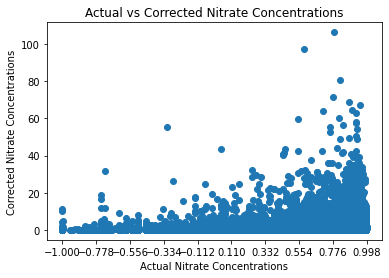

In [25]:
# Calculate the evaluation metrics
r2 = r2_score(yv_const, corrected_concentrations)
mae = mean_absolute_error(yv_const, corrected_concentrations)
mse = mean_squared_error(yv_const, corrected_concentrations)
rmse = mean_squared_error(yv_const, corrected_concentrations, squared=False)
mape = np.mean(np.abs((yv_const - corrected_concentrations) / yv_const)) * 100

# Print the metrics
print('R² score:', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error (MAPE):', mape, '%')

# Plotting the results
plt.figure()
plt.scatter(yv, corrected_concentrations)
plt.xlabel('Actual Nitrate Concentrations')
plt.ylabel('Corrected Nitrate Concentrations')
plt.title('Actual vs Corrected Nitrate Concentrations')

# Adjust x-ticks if necessary
xtick_range = np.linspace(yv.min(), yv.max(), num=10)  # Adjust number of ticks as needed
plt.xticks(xtick_range)

plt.show()


# Random Forest - Validation set from random stations

In [110]:
df = pd.read_csv('/Users/defne/Downloads/alles.csv')
# Remove the Unnamed: 0 and Datetime columns
df_const = df
df = df.drop(columns=['Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_47064/3307341843.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/alles.csv')


In [111]:
df.columns

#O_3 from Camx can be a good feature from Abshishek or Petros
#Meterology, temperature, RH, wind-speed, wind direction, pblh

Index(['station_id', 'site_latitude', 'site_longitude', 'NO3', 'SO4', 'NO3-',
       'SO42-', 'elevation_1k', 'elevation_yNA_bNA', 'road_class_1_700',
       'road_class_2_50', 'road_class_1_500', 'road_class_3_50',
       'road_class_2_400', 'road_class_1_100', 'road_class_2_700',
       'road_class_3_100', 'road_class_2_500', 'road_class_1_400',
       'road_class_3_400', 'road_class_1_2000', 'road_class_3_1000',
       'road_class_3_10000', 'road_class_1_300', 'road_class_3_500',
       'road_class_2_2000', 'road_class_1_1000', 'road_class_3_300',
       'road_class_2_200', 'road_class_1_200', 'road_class_2_1000',
       'road_class_1_5000', 'road_class_1_50', 'road_class_3_200',
       'road_class_3_5000', 'road_class_2_300', 'road_class_2_5000',
       'road_class_3_2000', 'road_class_2_100', 'road_class_3_700',
       'road_class_2_10000', 'road_class_1_10000', 'imd_b500', 'imd_b1000',
       'imd', 'CLC', 'snow_ice_b1000', 'snow_ice_b500', 'urban_fabric_b1000',
       'urban_fab

In [112]:
df_const.columns

Index(['station_id', 'Date', 'site_latitude', 'site_longitude', 'NO3', 'SO4',
       'NO3-', 'SO42-', 'elevation_1k', 'elevation_yNA_bNA',
       'road_class_1_700', 'road_class_2_50', 'road_class_1_500',
       'road_class_3_50', 'road_class_2_400', 'road_class_1_100',
       'road_class_2_700', 'road_class_3_100', 'road_class_2_500',
       'road_class_1_400', 'road_class_3_400', 'road_class_1_2000',
       'road_class_3_1000', 'road_class_3_10000', 'road_class_1_300',
       'road_class_3_500', 'road_class_2_2000', 'road_class_1_1000',
       'road_class_3_300', 'road_class_2_200', 'road_class_1_200',
       'road_class_2_1000', 'road_class_1_5000', 'road_class_1_50',
       'road_class_3_200', 'road_class_3_5000', 'road_class_2_300',
       'road_class_2_5000', 'road_class_3_2000', 'road_class_2_100',
       'road_class_3_700', 'road_class_2_10000', 'road_class_1_10000',
       'imd_b500', 'imd_b1000', 'imd', 'CLC', 'snow_ice_b1000',
       'snow_ice_b500', 'urban_fabric_b1000', 'u

In [114]:

# Assuming 'station_id' is the column to be excluded from NaN removal
station_id_column = df['station_id']

# Drop the 'Date' and 'station_id' columns from df
df = df.drop(columns=['station_id'])

# Store original indices
original_indices = df.index.copy()

# Convert columns to numeric, dropping rows where conversion results in NaN
for colname in df.columns:
    df[colname] = pd.to_numeric(df[colname], errors='coerce')

# Drop rows with NaN values in any column
df = df.dropna()

# Filter the 'station_id' column using the updated indices
removed_indices = original_indices.difference(df.index)
station_id_column = station_id_column.drop(index=removed_indices)

# Reattach the filtered 'station_id' column to df
df['station_id'] = station_id_column

In [115]:
df.shape

(173503, 78)

In [117]:
validation_site_ids = ['ID203','ID053','ID116','ID227']

In [118]:
#How many datapoints for validation
df[df['station_id'].isin(validation_site_ids)].shape #almost 10 percent of the data

(45913, 78)

In [119]:
df.columns

Index(['site_latitude', 'site_longitude', 'NO3', 'SO4', 'NO3-', 'SO42-',
       'elevation_1k', 'elevation_yNA_bNA', 'road_class_1_700',
       'road_class_2_50', 'road_class_1_500', 'road_class_3_50',
       'road_class_2_400', 'road_class_1_100', 'road_class_2_700',
       'road_class_3_100', 'road_class_2_500', 'road_class_1_400',
       'road_class_3_400', 'road_class_1_2000', 'road_class_3_1000',
       'road_class_3_10000', 'road_class_1_300', 'road_class_3_500',
       'road_class_2_2000', 'road_class_1_1000', 'road_class_3_300',
       'road_class_2_200', 'road_class_1_200', 'road_class_2_1000',
       'road_class_1_5000', 'road_class_1_50', 'road_class_3_200',
       'road_class_3_5000', 'road_class_2_300', 'road_class_2_5000',
       'road_class_3_2000', 'road_class_2_100', 'road_class_3_700',
       'road_class_2_10000', 'road_class_1_10000', 'imd_b500', 'imd_b1000',
       'imd', 'CLC', 'snow_ice_b1000', 'snow_ice_b500', 'urban_fabric_b1000',
       'urban_fabric_b500', 'in

In [120]:
# Identify non-numeric columns
print(df.dtypes)



site_latitude               float64
site_longitude              float64
NO3                         float64
SO4                         float64
NO3-                        float64
                             ...   
population_density_b1000    float64
population_density_b500     float64
population_density_b501     float64
population_density          float64
station_id                   object
Length: 78, dtype: object


In [121]:
# Assuming df_const has a 'site_id' column and can be merged with df
# Merge df with df_const


# Define the variable to predict (Nitrate) and features
y = df['NO3-']
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Split the data into training and validation sets based on site_id
xv = X[X['station_id'].isin(validation_site_ids)]  # X for validation
xx = X[~X['station_id'].isin(validation_site_ids)] # X for training
yv = y.loc[xv.index]  # Y for validation
yx = y.loc[xx.index]  # Y for training


# Drop the site_id column for model training and prediction
xx = xx.drop(columns=['station_id'])
xv = xv.drop(columns=['station_id'])


xx = xx.dropna()
xv = xv.dropna()
yx = yx.dropna()

print(xx.shape)
print(xv.shape)
xx.head(10)
# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=125)
regr.fit(xx, yx)  # Train with training data

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set

(127590, 76)
(45913, 76)


R² score: -6.423982481396437
Mean Absolute Error (MAE): 0.8624575506066561
Mean Squared Error (MSE): 2.825151953357447
Root Mean Squared Error (RMSE): 1.6808188341869112
Mean Absolute Percentage Error (MAPE): 99.83033902669057 %


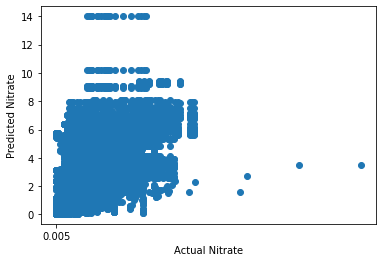

(45913,)
(45913,)


In [122]:
print('R² score:', regr.score(xv, yv))
print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))
print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))
print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(yv, y_val), '%')

# Convert yv to float
yv = pd.to_numeric(yv, errors='coerce')

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')

# Set x-ticks
xtick_range = np.arange(yv.min(), yv.max(), 10)
plt.xticks(xtick_range)

plt.show()

print(yv.shape)
print(y_val.shape)

# SHAP

In [17]:
!pip install shap

In [ ]:
import sys
print(sys.executable)


In [ ]:
!{sys.executable} -m pip install shap


In [18]:
df = pd.read_csv('/Users/defne/Downloads/alles.csv')
# Remove the Unnamed: 0 and Datetime columns
df_const = df
df = df.drop(columns=['station_id', 'Date'])

/var/folders/fs/9hkffwc95yz53x44d27zb2ym0000gn/T/ipykernel_44837/1848977408.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/defne/Downloads/alles.csv')


In [19]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]


In [20]:
#Getting rid of nan values and non numeric values
for col in df.columns:
     df[col] = pd.to_numeric(df[col], errors='coerce')


In [23]:
stations_for_validation = ['ID203','ID053','ID116']#almost 10 percent of the data

In [24]:
#How many datapoints for validation
df_const[df_const['station_id'].isin(stations_for_validation)].shape

(1213, 79)

In [25]:

# Define the variable to predict (Nitrate) and features

y = df['NO3-'] 
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Split the data into training and validation sets
xv = X.sample(frac=0.2)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(xv.index) # Y for training (80%)

#print(xx)
# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=125) # Need to tune these parameters
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set


In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor
#smaller subset of data, psi computer
#keep doing it in station splitting
# Assuming your model is already trained and is named 'regr'
# And your feature set for validation is 'xv'

# Initialize the SHAP Explainer with your model
explainer = shap.TreeExplainer(regr)

# Compute SHAP values for the validation set
shap_values = explainer.shap_values(xv)

# Generate a SHAP summary plot
shap.summary_plot(shap_values, xv, plot_type="bar")


#Focus on predicting the percentage error and predictions at unseen locations for validation 
#After these results send the plots, also metrics
#




# Comparison in unseen locations